![Titanc](https://user-images.githubusercontent.com/20658442/175980912-7dab1a6a-9570-4b8f-930e-d37bd1ed22fa.png)

# It's time to discover what happened with Titanc !!

#### **1.Check the data**

In [86]:
# check the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# try looking into the info and statistics summary
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### **2.Check Null Values**

In [87]:
# check the null values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


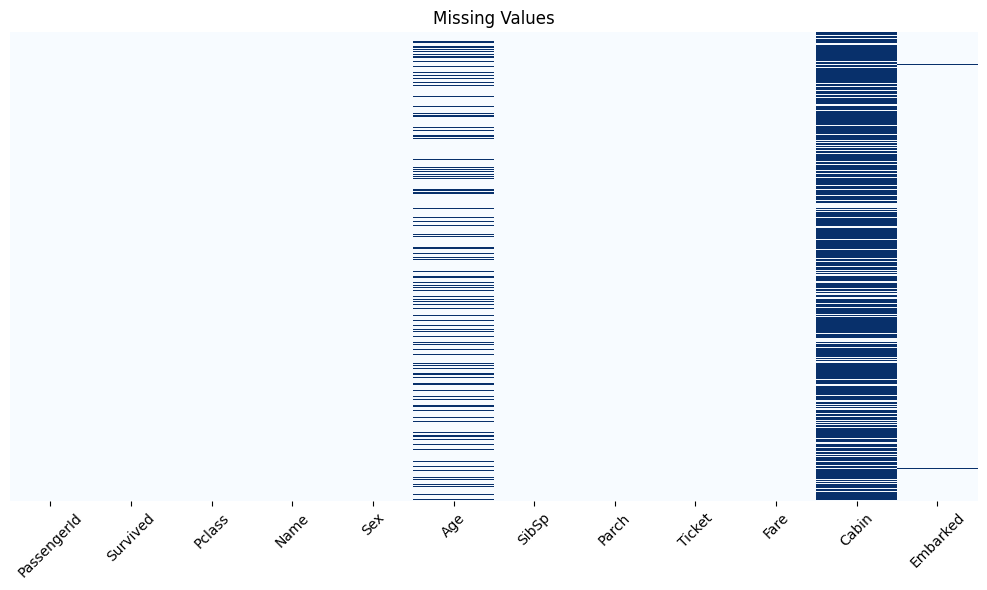

In [88]:
# Plot a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='Blues', yticklabels=False)
plt.title("Missing Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **3.It's time to decide what to do with the null values**

**You should decide on your own what to do with the null values and after you finish you should explain your solution**

**Hint:** did you know that some people migh have just get it into the ship in an illegal way !!!!!

In [89]:
#Age (177 missing value )
median_age = df['Age'].median()
print(median_age)
df['Age'].fillna(df['Age'].median(),inplace=True) # Replace missing values with the median

28.0


<ipython-input-89-9211173327b2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True) # Replace missing values with the median


In [90]:
#There is a significant portion of the data missing in the cabin column
df['Cabin'].fillna('unknown',inplace=True) # Replace missing values with 'Unknown'

<ipython-input-90-19b0f240c68c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('unknown',inplace=True) # Replace missing values with 'Unknown'


In [91]:
# only 2 values are missing in Embarked
mode= df['Embarked'].mode()
print(mode)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True) ## Fill with the most frequent value

0    S
Name: Embarked, dtype: object


<ipython-input-91-1873290ef907>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True) ## Fill with the most frequent value


In [92]:
#check After Handling
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


*** explainantion:***
1. Age Column - Used Median
Age contains numerical data with potential outliers

Median is robust against extreme values

Better representation than mean for skewed distributions


2. Cabin Column - Used 'Unknown'
High percentage of missing textual data

Over 70% missing values makes deletion impractical

'Unknown' preserves records while marking missingness


3. Embarked Column - Used Mode
Categorical data with few missing values

Only 2 missing values

Mode maintains original distribution


4. Why We Didn't Delete Rows
Data preservation

Deletion could lose >20% of dataset

Particularly important for Cabin column

Complete-case analysis reduces statistical power       // :)

#### **4.Time to do analysis**

## Here is some question to help you

- What percentage of passengers survived overall?
  - How many passengers from each class (Pclass) survived?
  - What is the survival rate by embarkation point (Embarked: C, Q, S)?

- Does the survival rate differ between men and women (Sex)?
  - For each class, do men or women have a higher survival rate?
  - How does survival rate differ between men and women across different age groups?

- How does the survival rate vary by class (Pclass)?
  - Within each class, how does survival rate differ between those traveling alone versus those with family (SibSp and Parch)?
  - Were first-class passengers more likely to have a cabin number, and does having a cabin correlate with survival?
  - Does class have a relation with age? and does it all effect the survival?

- Does age (Age) influence survival rate?
  - What is the survival rate for children, adults, and seniors?
  - How does the survival rate differ for male and female passengers across various age ranges?


Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


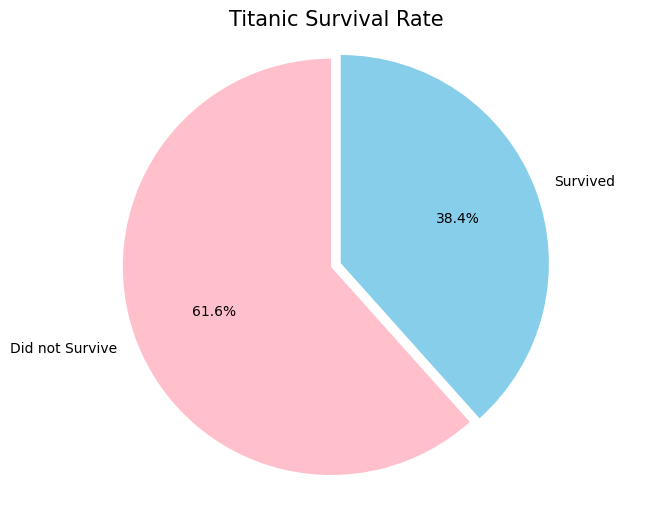

In [94]:
#the percentage of passengers who survived
survival_rate = df['Survived'].value_counts(normalize=True) * 100
print(survival_rate)

# pie chart
plt.figure(figsize=(8, 6))
plt.pie(survival_rate,
        labels=['Did not Survive', 'Survived'],
        autopct='%1.1f%%',
        colors=['pink','skyblue'],
        explode=(0.05, 0),
        startangle=90)

plt.title('Titanic Survival Rate', fontsize=15)
plt.axis('equal')
plt.show()

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


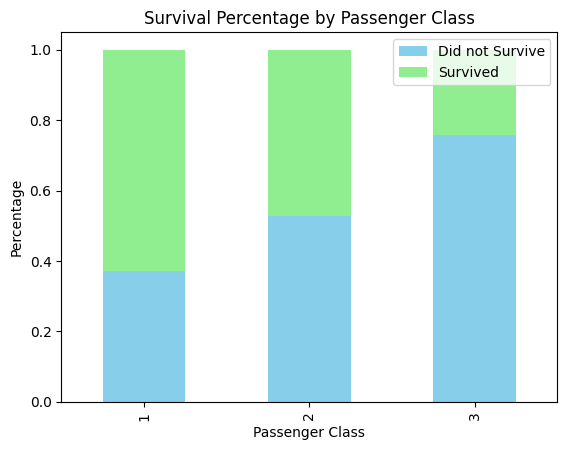

In [96]:
# Count of survived and not survived grouped by Pclass
pclass_survival = pd.crosstab(df['Pclass'], df['Survived'])
print(pclass_survival)

#bar plot for survival by passenger class

pclass_survival.div(pclass_survival.sum(1), axis=0).plot(
    kind='bar',
    stacked=True,
    color=['skyblue','lightgreen']
)
plt.title('Survival Percentage by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Percentage')
plt.legend(['Did not Survive', 'Survived'])
plt.show()


Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64


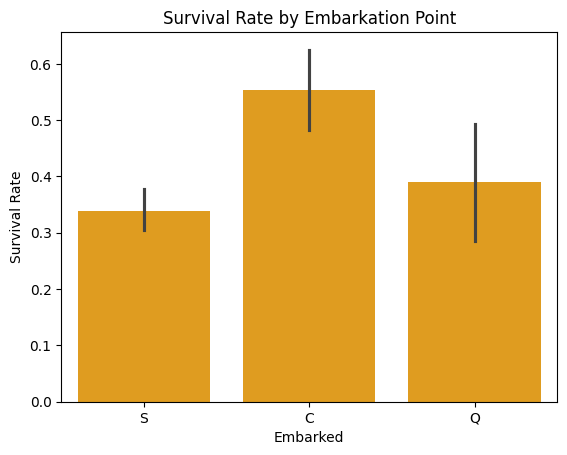

In [97]:
#survival rate for each embarkation point
embarked_survival = df.groupby('Embarked')['Survived'].mean() * 100
print(embarked_survival)

# Bar plot for survival rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=df ,color='orange')
plt.title('Survival Rate by Embarkation Point')
plt.ylabel('Survival Rate')
plt.show()

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


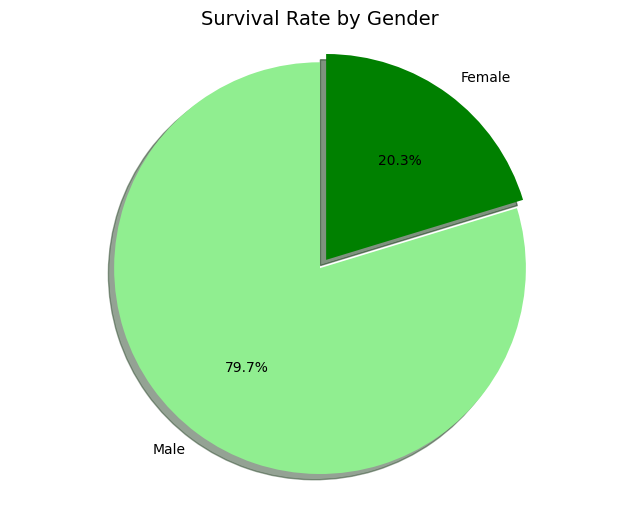

In [98]:
#survival rate by gender
gender_survival = df.groupby('Sex')['Survived'].mean() * 100
print(gender_survival)

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_survival,
        labels=['Male', 'Female'],
        autopct='%1.1f%%',
        colors=['lightgreen','green'],
        startangle=90,
        explode=(0.05, 0),
        shadow=True)

plt.title('Survival Rate by Gender', fontsize=14)
plt.axis('equal')
plt.show()


Pclass  Sex   
1       female    96.808511
        male      36.885246
2       female    92.105263
        male      15.740741
3       female    50.000000
        male      13.544669
Name: Survived, dtype: float64


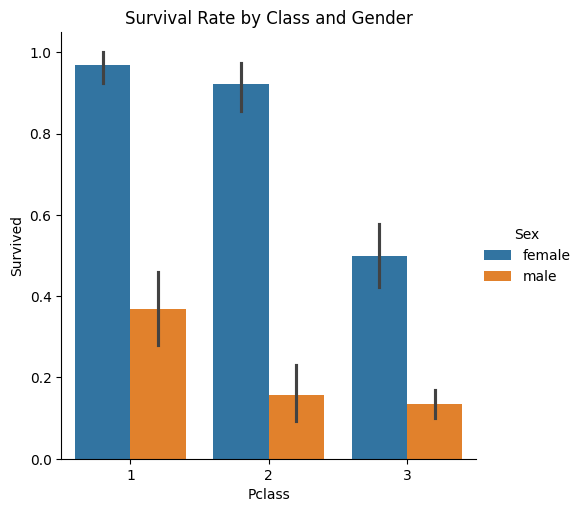

In [99]:
# Group by Pclass and Sex to get survival rate
class_gender_survival = df.groupby(['Pclass', 'Sex'])['Survived'].mean() * 100
print(class_gender_survival)

# Bar plot comparing survival rates by gender across classes
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=df)
plt.title('Survival Rate by Class and Gender')
plt.show()


<ipython-input-100-83e7dd019a0d>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_survival = df.groupby(['AgeGroup', 'Sex'])['Survived'].mean() * 100


AgeGroup  Sex   
Child     female     59.375000
          male       56.756757
Teen      female     75.000000
          male        8.823529
Adult     female     75.720165
          male       17.043121
Senior    female    100.000000
          male       10.526316
Name: Survived, dtype: float64


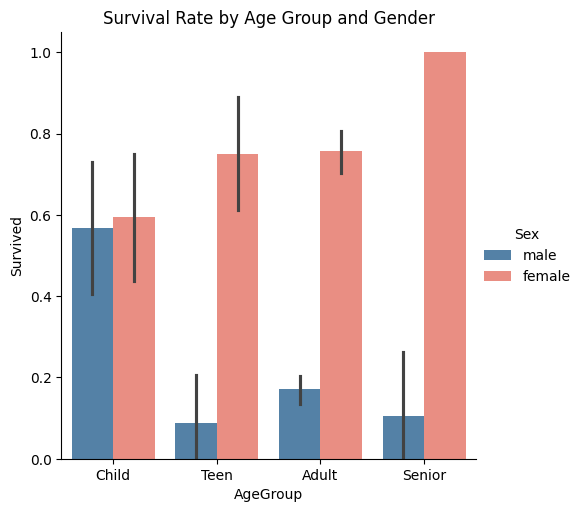

In [100]:
# Define age groups
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calculate survival rate for each gender and age group
age_gender_survival = df.groupby(['AgeGroup', 'Sex'])['Survived'].mean() * 100
print(age_gender_survival)

# Bar plot of survival by age group and gender
sns.catplot(
    x='AgeGroup',
    y='Survived',
    hue='Sex',
    kind='bar',
    data=df,
    palette={'male': 'steelblue', 'female': 'salmon'}
)

plt.title('Survival Rate by Age Group and Gender')
plt.show()


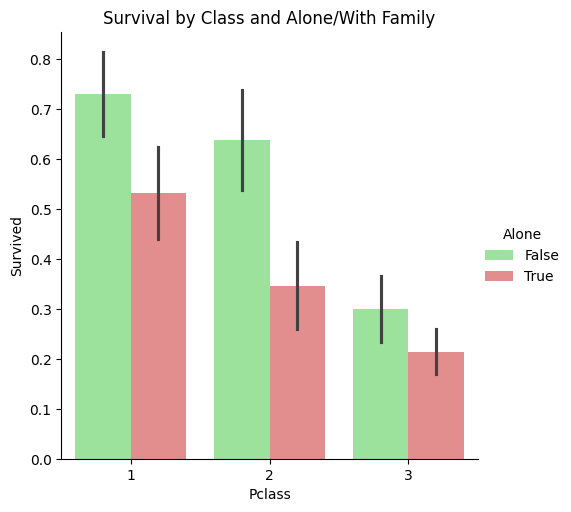

In [101]:
# Create new column indicating if passenger was alone
df['Alone'] = (df['SibSp'] + df['Parch'] == 0)

# Bar plot with custom colors for Alone vs With Family
sns.catplot(
    x='Pclass',
    y='Survived',
    hue='Alone',
    kind='bar',
    data=df,
    palette={True: 'lightcoral', False: 'lightgreen'}
)

plt.title('Survival by Class and Alone/With Family')
plt.show()


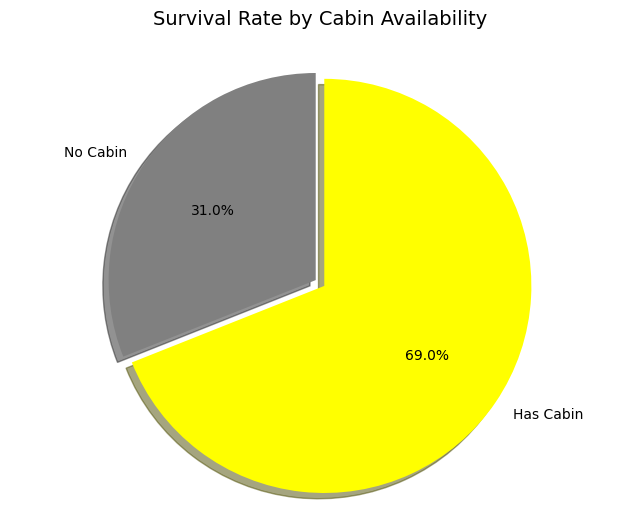

In [102]:
# Create column for cabin availability
df['HasCabin'] = df['Cabin'] != 'unknown'

# Calculate survival rates
cabin_survival = df.groupby('HasCabin')['Survived'].mean() * 100

#pie chart
plt.figure(figsize=(8, 6))
plt.pie(cabin_survival,
        labels=['No Cabin', 'Has Cabin'],
        autopct='%1.1f%%',
        colors=['gray', 'yellow'],
        explode=(0.05, 0),
        shadow=True,
        startangle=90)

plt.title('Survival Rate by Cabin Availability', fontsize=14, pad=20)
plt.axis('equal')
plt.show()

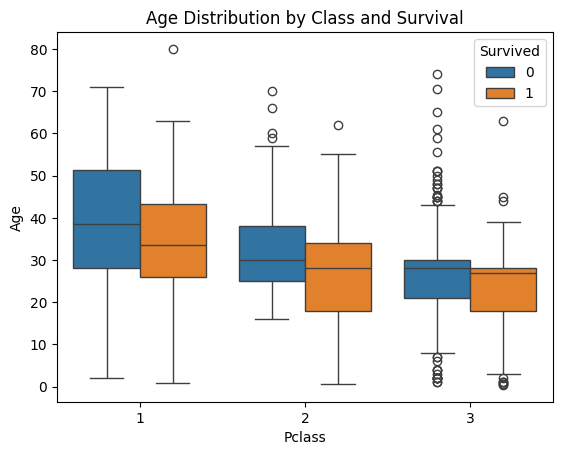

In [103]:
# Box plot to show age distribution by class and survival status
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title('Age Distribution by Class and Survival')
plt.show()


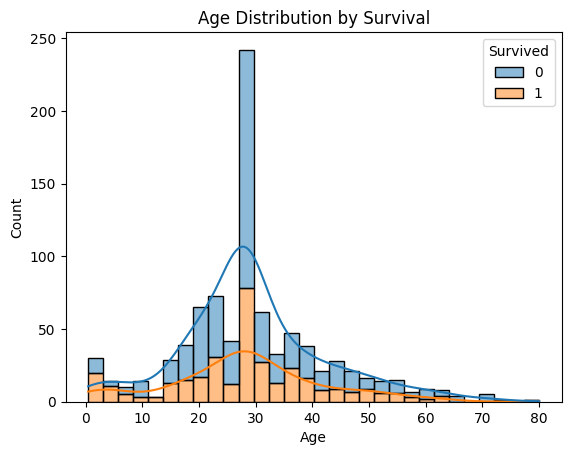

In [104]:
# Histogram showing age distribution split by survival
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Survival')
plt.show()


AgeGroup
Child     57.971014
Teen      42.857143
Adult     36.575342
Senior    22.727273
Name: Survived, dtype: float64


<ipython-input-105-837957bfef9b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = df.groupby('AgeGroup')['Survived'].mean() * 100


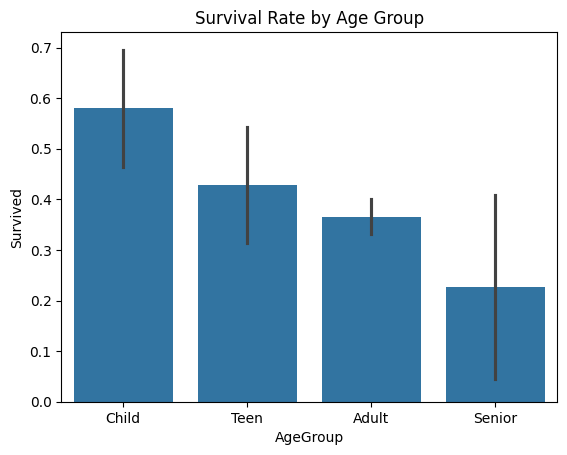

In [105]:
# Survival rate per defined age group
age_group_survival = df.groupby('AgeGroup')['Survived'].mean() * 100
print(age_group_survival)

# Bar plot showing survival rate by age group
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()


### Your amazing conclusion:

**Note:** You will be given your degree based on how much amount of effort made in the analysis and maybe if you did more than well you will be given bouns !!


- Gender: Women had a significantly higher survival rate compared to men.

- Class: First-class passengers had a much higher chance of survival compared to those in second and especially third class.

- Age: Children had a higher survival rate, while seniors were the most vulnerable group.

- Cabin: Passengers with a cabin (mostly in higher classes) had a better chance of survival.

*Overall Conclusion: Survival was heavily influenced by gender, class, age, family presence, and embarkation point.

# ***I hope it’s clear and that I performed well   : )***